# Exploring the Business Dataset

## Introduction

## Methodology

## Data Loading


### Read the dataset


In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval

In [170]:
%%time
business_df = pd.read_json('../data/business.json', lines=True)
business_df.head()

CPU times: user 3.2 s, sys: 533 ms, total: 3.74 s
Wall time: 3.74 s


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [171]:
business_df.shape

(160585, 14)

This dataset has 160,585 rows and 14 columns. 

### Data Dictionary

We now examine the data types of each column and investigate what each column describes.

In [172]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


We have a mix of numeric and non-numeric columns in the dataset. We look at each column individually.


## Data Cleaning

### Filter for food establishments

We now filter for establishments with the category names of restaurant, food, brunch, and breakfast as save those establishments to a new dataframe.

In [173]:
# Filter for restaurnts that contain a restauarant description in the categories column
# and save to new dataframe
restaurant_df = business_df[business_df['categories'].str.contains('restaurant', case=False)==True].reset_index().drop('index', axis=1)
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
3,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
4,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [174]:
restaurant_df.shape

(50793, 14)

Filtering for restaurants has produced 50,793 rows (31.6% of our original business dataframe).

### Check for Duplicate Rows

In [175]:
print(type(restaurant_df['attributes'][0]))

<class 'dict'>


In [176]:
type(restaurant_df['hours'][0])

dict

In [177]:
temp_df = restaurant_df.copy()

temp_df['attributes'] = temp_df['attributes'].astype(str)
temp_df['hours'] = temp_df['hours'].astype(str)

attributes_type = type(restaurant_df['attributes'][0])
hours_type = type(restaurant_df['hours'][0])

print(f'Attributes column is a {attributes_type} object in temp_df.')
print(f'Hours column is a {hours_type} object in temp_df.')

Attributes column is a <class 'dict'> object in temp_df.
Hours column is a <class 'dict'> object in temp_df.


In [178]:
temp_df.duplicated().value_counts()/temp_df.shape[0] * 100

False    100.0
dtype: float64

We have no duplicate rows in this dataset.

### Check for Missing Values

In [179]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50793 entries, 0 to 50792
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   50793 non-null  object 
 1   name          50793 non-null  object 
 2   address       50793 non-null  object 
 3   city          50793 non-null  object 
 4   state         50793 non-null  object 
 5   postal_code   50793 non-null  object 
 6   latitude      50793 non-null  float64
 7   longitude     50793 non-null  float64
 8   stars         50793 non-null  float64
 9   review_count  50793 non-null  int64  
 10  is_open       50793 non-null  int64  
 11  attributes    50343 non-null  object 
 12  categories    50793 non-null  object 
 13  hours         42904 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.4+ MB


### Examine the attributes column

Let us examine the number of missing values from the `attributes` column.

In [180]:
missing_value_count = restaurant_df['attributes'].isna().sum()
pct_missing_values = missing_value_count/restaurant_df.shape[0] * 100

print(f'Number of missing values from attributes column: {missing_value_count} ({round(pct_missing_values,2)}%)')

Number of missing values from attributes column: 450 (0.89%)


We have extremely few missing values in this column (< 1%). However, recall this column contains dictionaries of attributes that have been assigned to each restaurant. So we would need to expand each attribute into a binarized column to be able to explore these variables meaningfully. The documentation also warns that some attribute values might also be objects, hence those attribute columns would need to expanded as well before being able to binarize them.

As per Yelp's website, some of these attributes are considered factual and these factual attributes are entered by the businesses themselves when claiming their Yelp page, while some attributes, which are considered subjective, are established by Yelp users who vote on it and they cannot be set by the business.

With this information in mind, we will do the following steps:

1. Filter out any restaurants with missing attributes dictionaries
    - This will exclude any restaurants who are missing both factual and subjective attributes. Since a restaurant can have a many attributes, it would not be possible to impute these missing attributes meaningfully. These restaurants represent less than 1% of our dataset.
    
    
    
2. Only include any restaurants that have a minimum number of reviews
    - Setting a minimum number of reviews gives us a better chance of analyzing restaurants that have had enough users vote on the subjective attributes, minimizing the number of missing values we may see when expanding the subjective attributes.


In [181]:
# Step 1. Drop rows with missing attribute values

restaurant_df = restaurant_df.dropna(axis=0, subset=['attributes']).reset_index().drop('index',axis=1)
restaurant_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
3,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."


In [182]:
# Verify
missing_value_count = restaurant_df['attributes'].isna().sum()

print(f'Number of missing values in attributes column: {missing_value_count}')
print(f'New shape of the dataset: {restaurant_df.shape}')

Number of missing values in attributes column: 0
New shape of the dataset: (50343, 14)


We have successfully dropped the rows with missing attribute columns.

In [183]:
restaurant_df['review_count'].describe()

count    50343.000000
mean       107.089168
std        207.397814
min          5.000000
25%         16.000000
50%         43.000000
75%        115.000000
max       9185.000000
Name: review_count, dtype: float64

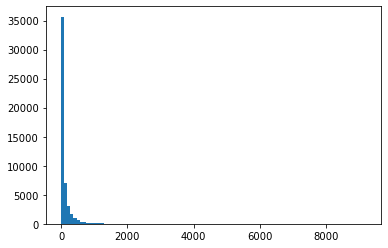

In [184]:
plt.figure()
plt.hist(restaurant_df['review_count'], bins=100)
plt.show()

In [185]:
restaurant_df[restaurant_df['review_count'] < 1000]['review_count']

0         86
1        126
2        169
3         39
4        135
        ... 
50338     48
50339    310
50340    185
50341     10
50342     82
Name: review_count, Length: 49952, dtype: int64

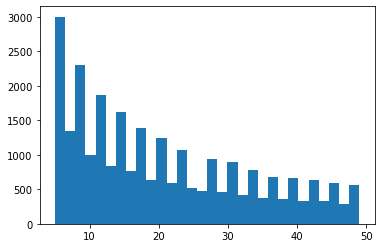

In [186]:
plt.figure()
plt.hist(restaurant_df[restaurant_df['review_count'] < 50]['review_count'], bins=30)
plt.show()

In [187]:
%%time
attributes_df = restaurant_df['attributes'].apply(pd.Series)
attributes_df.head()

CPU times: user 13 s, sys: 86.7 ms, total: 13.1 s
Wall time: 13.1 s


,RestaurantsTableService,WiFi,BikeParking,BusinessParking,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,...,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,DietaryRestrictions,AgesAllowed,Open24Hours,AcceptsInsurance,HairSpecializesIn
0,True,u'free',True,"{'garage': False, 'street': True, 'validated':...",True,False,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,u'free',False,"{'garage': True, 'street': False, 'validated':...",True,False,NaN,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,u'no',True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,u'free',True,"{'garage': False, 'street': False, 'validated'...",True,False,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
attributes_columns = attributes_df.columns
attributes_columns

Index(['RestaurantsTableService', 'WiFi', 'BikeParking', 'BusinessParking',
       'BusinessAcceptsCreditCards', 'RestaurantsReservations',
       'WheelchairAccessible', 'Caters', 'OutdoorSeating',
       'RestaurantsGoodForGroups', 'HappyHour', 'BusinessAcceptsBitcoin',
       'RestaurantsPriceRange2', 'Ambience', 'HasTV', 'Alcohol', 'GoodForMeal',
       'DogsAllowed', 'RestaurantsTakeOut', 'NoiseLevel', 'RestaurantsAttire',
       'RestaurantsDelivery', 'GoodForKids', 'ByAppointmentOnly', 'Music',
       'GoodForDancing', 'BestNights', 'BYOB', 'CoatCheck', 'Smoking',
       'DriveThru', 'BYOBCorkage', 'Corkage', 'RestaurantsCounterService',
       'DietaryRestrictions', 'AgesAllowed', 'Open24Hours', 'AcceptsInsurance',
       'HairSpecializesIn'],
      dtype='object')

In [189]:
restaurant_df2 = pd.concat([restaurant_df, attributes_df], axis=1).drop('attributes', axis=1)

In [190]:
restaurant_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50343 entries, 0 to 50342
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 50343 non-null  object 
 1   name                        50343 non-null  object 
 2   address                     50343 non-null  object 
 3   city                        50343 non-null  object 
 4   state                       50343 non-null  object 
 5   postal_code                 50343 non-null  object 
 6   latitude                    50343 non-null  float64
 7   longitude                   50343 non-null  float64
 8   stars                       50343 non-null  float64
 9   review_count                50343 non-null  int64  
 10  is_open                     50343 non-null  int64  
 11  categories                  50343 non-null  object 
 12  hours                       42674 non-null  object 
 13  RestaurantsTableService     191

In [191]:
type(restaurant_df2.columns.tolist())

list

In [192]:
temp_columns = attributes_columns.to_list()
temp_columns.insert(0, 'Minimum Review Count')
temp_columns.insert(1, 'Number of rows')
temp_columns

['Minimum Review Count',
 'Number of rows',
 'RestaurantsTableService',
 'WiFi',
 'BikeParking',
 'BusinessParking',
 'BusinessAcceptsCreditCards',
 'RestaurantsReservations',
 'WheelchairAccessible',
 'Caters',
 'OutdoorSeating',
 'RestaurantsGoodForGroups',
 'HappyHour',
 'BusinessAcceptsBitcoin',
 'RestaurantsPriceRange2',
 'Ambience',
 'HasTV',
 'Alcohol',
 'GoodForMeal',
 'DogsAllowed',
 'RestaurantsTakeOut',
 'NoiseLevel',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'GoodForKids',
 'ByAppointmentOnly',
 'Music',
 'GoodForDancing',
 'BestNights',
 'BYOB',
 'CoatCheck',
 'Smoking',
 'DriveThru',
 'BYOBCorkage',
 'Corkage',
 'RestaurantsCounterService',
 'DietaryRestrictions',
 'AgesAllowed',
 'Open24Hours',
 'AcceptsInsurance',
 'HairSpecializesIn']

In [193]:
na_count_df = pd.DataFrame(columns=temp_columns).set_index('Minimum Review Count')

for n in range(10, 160, 10):
    df = restaurant_df2[restaurant_df2['review_count'] >= n]
    na_count_df.loc[n,:] = df.isna().sum()/df.shape[0]
    na_count_df.loc[n, 'Number of rows'] = df.shape[0]
        
na_count_df.style.background_gradient(axis=0)

,Number of rows,RestaurantsTableService,WiFi,BikeParking,BusinessParking,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,HappyHour,BusinessAcceptsBitcoin,RestaurantsPriceRange2,Ambience,HasTV,Alcohol,GoodForMeal,DogsAllowed,RestaurantsTakeOut,NoiseLevel,RestaurantsAttire,RestaurantsDelivery,GoodForKids,ByAppointmentOnly,Music,GoodForDancing,BestNights,BYOB,CoatCheck,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,DietaryRestrictions,AgesAllowed,Open24Hours,AcceptsInsurance,HairSpecializesIn
Minimum Review Count,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,43693,0.584693,0.180807,0.243082,0.051107,0.157417,0.097682,0.717369,0.259424,0.083560,0.121324,0.706269,0.866317,0.081523,0.126611,0.124276,0.139656,0.366992,0.746481,0.035521,0.232326,0.162360,0.050626,0.131714,0.921338,0.878493,0.916005,0.901746,0.927586,0.910443,0.924977,0.899732,0.919049,0.915135,0.999085,0.998489,0.999588,0.999291,0.999817,0.999977
20,35560,0.538470,0.118588,0.177812,0.023678,0.131637,0.068926,0.688273,0.192576,0.052306,0.089454,0.663133,0.849916,0.056299,0.078628,0.078543,0.094207,0.294966,0.708690,0.022103,0.166057,0.129837,0.032087,0.100956,0.907790,0.858211,0.901181,0.882762,0.919066,0.895697,0.913583,0.894826,0.906355,0.903262,0.998931,0.998256,0.999522,0.999128,0.999831,0.999972
30,30253,0.505008,0.087529,0.141573,0.013387,0.117707,0.053945,0.666744,0.153274,0.037847,0.070175,0.628004,0.836909,0.040525,0.058804,0.059730,0.069712,0.248240,0.677288,0.017023,0.126996,0.109576,0.024031,0.082273,0.896704,0.840743,0.887581,0.866327,0.913331,0.883218,0.903679,0.895548,0.895382,0.894622,0.998777,0.998116,0.999471,0.999008,0.999868,0.999967
40,26392,0.479312,0.067672,0.118293,0.009359,0.104729,0.044900,0.649288,0.124280,0.030047,0.058124,0.598742,0.826008,0.030805,0.048424,0.048689,0.055547,0.215747,0.650197,0.013489,0.101584,0.095787,0.019172,0.069832,0.887731,0.828054,0.876629,0.852607,0.907775,0.874015,0.896408,0.895309,0.885496,0.886594,0.998598,0.998105,0.999432,0.998901,0.999848,1.000000
50,23342,0.458187,0.054194,0.101448,0.006726,0.094850,0.038257,0.633665,0.103890,0.024505,0.049010,0.572145,0.816297,0.023777,0.041085,0.041727,0.045283,0.189187,0.624068,0.011738,0.084097,0.084054,0.015637,0.060535,0.879102,0.815269,0.865778,0.840074,0.901979,0.864665,0.888656,0.895981,0.877089,0.879273,0.998415,0.997986,0.999357,0.998758,0.999829,1.000000
60,20803,0.442388,0.043936,0.090996,0.005720,0.085949,0.033697,0.622266,0.088737,0.020862,0.042157,0.548575,0.808057,0.017786,0.036485,0.037206,0.039033,0.170985,0.600058,0.010864,0.069990,0.073451,0.014036,0.052637,0.870740,0.804788,0.856078,0.829303,0.897995,0.857136,0.882036,0.894727,0.867808,0.873288,0.998221,0.997933,0.999327,0.998702,0.999856,1.000000
70,18787,0.428541,0.036781,0.081386,0.005057,0.079683,0.028903,0.611646,0.077394,0.017619,0.035982,0.528717,0.799436,0.014105,0.032842,0.033161,0.033214,0.154681,0.578166,0.009847,0.059722,0.065684,0.012455,0.046202,0.862831,0.795071,0.847128,0.819450,0.893277,0.850216,0.876138,0.894714,0.858732,0.866291,0.998031,0.997871,0.999414,0.998616,0.999894,1.000000
80,17061,0.417678,0.032120,0.074263,0.004689,0.073677,0.026962,0.604126,0.067347,0.015767,0.032530,0.509583,0.793623,0.011605,0.029717,0.030831,0.030713,0.141668,0.560753,0.009202,0.052224,0.059141,0.011312,0.041733,0.856456,0.785534,0.838169,0.810093,0.888987,0.843972,0.870172,0.895141,0.851005,0.860149,0.998007,0.997831,0.999355,0.998476,0.999883,1.000000
90,15599,0.407270,0.027758,0.067120,0.004680,0.068466,0.025322,0.597859,0.058786,0.014424,0.028848,0.494647,0.786845,0.008975,0.027758,0.028720,0.027758,0.131226,0.544073,0.008783,0.045772,0.053080,0.010834,0.037631,0.850888,0.778191,0.831015,0.802487,0.884416,0.839028,0.865120,0.893583,0.844734,0.853452,0.997884,0.997756,0.999295,0.998397,0.999872,1.000000


In [194]:
restaurant_df2 = restaurant_df2[restaurant_df2['review_count'] >= 50]

In [195]:
restaurant_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 50342
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 23342 non-null  object 
 1   name                        23342 non-null  object 
 2   address                     23342 non-null  object 
 3   city                        23342 non-null  object 
 4   state                       23342 non-null  object 
 5   postal_code                 23342 non-null  object 
 6   latitude                    23342 non-null  float64
 7   longitude                   23342 non-null  float64
 8   stars                       23342 non-null  float64
 9   review_count                23342 non-null  int64  
 10  is_open                     23342 non-null  int64  
 11  categories                  23342 non-null  object 
 12  hours                       22373 non-null  object 
 13  RestaurantsTableService     126

### Drop Columns with Excessive % of Missing values

In [196]:
restaurant_df3 = restaurant_df2.copy()

# Verfiy
restaurant_df3.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,DietaryRestrictions,AgesAllowed,Open24Hours,AcceptsInsurance,HairSpecializesIn
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
missing_value_counts = (restaurant_df3.isna().sum()/restaurant_df3.shape[0]*100).sort_values(ascending=False)

cols_to_drop = missing_value_counts[missing_value_counts>30]
print(f'Number of columns with >30% missing values: {cols_to_drop.shape[0]}')
cols_to_drop

Number of columns with >30% missing values: 21


HairSpecializesIn            100.000000
AcceptsInsurance              99.982864
AgesAllowed                   99.935738
Open24Hours                   99.875760
RestaurantsCounterService     99.841487
DietaryRestrictions           99.798646
BYOB                          90.197926
DriveThru                     89.598149
Smoking                       88.865564
Corkage                       87.927341
ByAppointmentOnly             87.910205
BYOBCorkage                   87.708851
GoodForDancing                86.577843
CoatCheck                     86.466455
BestNights                    84.007369
BusinessAcceptsBitcoin        81.629680
Music                         81.526861
WheelchairAccessible          63.366464
DogsAllowed                   62.406820
HappyHour                     57.214463
RestaurantsTableService       45.818696
dtype: float64

In [198]:
restaurant_df3.drop(cols_to_drop.index, axis=1, inplace=True)
restaurant_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23342 entries, 0 to 50342
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 23342 non-null  object 
 1   name                        23342 non-null  object 
 2   address                     23342 non-null  object 
 3   city                        23342 non-null  object 
 4   state                       23342 non-null  object 
 5   postal_code                 23342 non-null  object 
 6   latitude                    23342 non-null  float64
 7   longitude                   23342 non-null  float64
 8   stars                       23342 non-null  float64
 9   review_count                23342 non-null  int64  
 10  is_open                     23342 non-null  int64  
 11  categories                  23342 non-null  object 
 12  hours                       22373 non-null  object 
 13  WiFi                        220

### Inspection of the other categorical columns

In [199]:
attributes_list=[]

for attribute in attributes_columns:
    if attribute in restaurant_df3.columns:
        attributes_list.append(attribute)
        
len(attributes_list)

18

In [200]:
for attribute in attributes_columns:
    if attribute in restaurant_df3.columns:
        #attributes_list.append(attribute)
        #col = restaurant_df3.columns[i]
        print(f'Attribute: {attribute}; # of unique values: {len(restaurant_df3[attribute].unique())}')

        if len(restaurant_df3[attribute].unique()) <= 10:
            print(f'Unique values: {restaurant_df3[attribute].unique()}')

        else:
            print('More than 10 unique values')
        print('\n')

Attribute: WiFi; # of unique values: 8
Unique values: ["u'free'" "u'no'" nan "'no'" "'free'" "u'paid'" "'paid'" 'None']


Attribute: BikeParking; # of unique values: 4
Unique values: ['True' 'False' nan 'None']


Attribute: BusinessParking; # of unique values: 88
More than 10 unique values


Attribute: BusinessAcceptsCreditCards; # of unique values: 3
Unique values: ['True' nan 'False']


Attribute: RestaurantsReservations; # of unique values: 4
Unique values: ['False' 'True' nan 'None']


Attribute: Caters; # of unique values: 4
Unique values: ['True' 'False' nan 'None']


Attribute: OutdoorSeating; # of unique values: 4
Unique values: ['True' 'False' nan 'None']


Attribute: RestaurantsGoodForGroups; # of unique values: 4
Unique values: ['True' 'False' nan 'None']


Attribute: RestaurantsPriceRange2; # of unique values: 5
Unique values: ['2' '1' nan '3' '4']


Attribute: Ambience; # of unique values: 1285
More than 10 unique values


Attribute: HasTV; # of unique values: 4
Unique val

In [201]:
restaurant_df3.replace('None', np.NaN, inplace=True)

In [202]:
for attribute in attributes_columns:
    if attribute in restaurant_df3.columns:
        print(f'Attribute: {attribute}; # of unique values: {len(restaurant_df3[attribute].unique())}')

        if len(restaurant_df3[attribute].unique()) <= 10:
            print(f'Unique values: {restaurant_df3[attribute].unique()}')

        else:
            print('More than 10 unique values')
        print('\n')

Attribute: WiFi; # of unique values: 7
Unique values: ["u'free'" "u'no'" nan "'no'" "'free'" "u'paid'" "'paid'"]


Attribute: BikeParking; # of unique values: 3
Unique values: ['True' 'False' nan]


Attribute: BusinessParking; # of unique values: 87
More than 10 unique values


Attribute: BusinessAcceptsCreditCards; # of unique values: 3
Unique values: ['True' nan 'False']


Attribute: RestaurantsReservations; # of unique values: 3
Unique values: ['False' 'True' nan]


Attribute: Caters; # of unique values: 3
Unique values: ['True' 'False' nan]


Attribute: OutdoorSeating; # of unique values: 3
Unique values: ['True' 'False' nan]


Attribute: RestaurantsGoodForGroups; # of unique values: 3
Unique values: ['True' 'False' nan]


Attribute: RestaurantsPriceRange2; # of unique values: 5
Unique values: ['2' '1' nan '3' '4']


Attribute: Ambience; # of unique values: 1284
More than 10 unique values


Attribute: HasTV; # of unique values: 3
Unique values: ['True' 'False' nan]


Attribute: Alc

Let us inspect the columns that have more than 10 unique values - `BusinessParking`, `Ambience`, `GoodForMeal`.

In [203]:
restaurant_df3[['BusinessParking']].head()

,BusinessParking
0,"{'garage': False, 'street': True, 'validated':..."
1,"{'garage': True, 'street': False, 'validated':..."
2,"{'garage': False, 'street': True, 'validated':..."
4,"{'garage': False, 'street': False, 'validated'..."
9,"{'garage': True, 'street': False, 'validated':..."


In [204]:
restaurant_df3[['Ambience']].head()

,Ambience
0,"{'touristy': False, 'hipster': False, 'romanti..."
1,"{'romantic': False, 'intimate': False, 'touris..."
2,"{'romantic': False, 'intimate': False, 'classy..."
4,NaN
9,"{'touristy': None, 'hipster': False, 'romantic..."


In [205]:
restaurant_df3[['GoodForMeal']].head()

,GoodForMeal
0,"{'dessert': False, 'latenight': False, 'lunch'..."
1,"{'dessert': False, 'latenight': False, 'lunch'..."
2,"{'dessert': False, 'latenight': False, 'lunch'..."
4,NaN
9,"{'dessert': None, 'latenight': False, 'lunch':..."


These three columns contain nested dictionaries as their values. Hence it is no surprise they had so many unqiue values. We will investigate expand these columns as well. However, similar to how we approached the `attributes` column, we will drop rows with missing values in the `BusinessParking`, `Ambience`, `GoodForMeal` columns.

In [206]:
dictionary_attributes = ['BusinessParking', 'Ambience', 'GoodForMeal']

In [207]:
for attribute in dictionary_attributes:

    missing_value_count = restaurant_df3[attribute].isna().sum()
    pct_missing_values = missing_value_count/restaurant_df3.shape[0] * 100

    print(f'Number of missing values from {attribute} column: {missing_value_count} ({round(pct_missing_values,2)}%)')

Number of missing values from BusinessParking column: 322 (1.38%)
Number of missing values from Ambience column: 1005 (4.31%)
Number of missing values from GoodForMeal column: 4458 (19.1%)


In [208]:
restaurant_df3 = restaurant_df3.\
        drop(restaurant_df3[restaurant_df3[dictionary_attributes].isna().any(axis=1)].index).\
        reset_index().drop('index', axis=1)

restaurant_df3.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsPriceRange2,Ambience,HasTV,Alcohol,GoodForMeal,RestaurantsTakeOut,NoiseLevel,RestaurantsAttire,RestaurantsDelivery,GoodForKids
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,...,2,"{'touristy': False, 'hipster': False, 'romanti...",True,'beer_and_wine',"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average','casual',NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,...,2,"{'romantic': False, 'intimate': False, 'touris...",False,u'beer_and_wine',"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average',u'casual',False,True
2,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,...,2,"{'romantic': False, 'intimate': False, 'classy...",False,u'none',"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average',u'casual',True,True
3,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,...,2,"{'touristy': None, 'hipster': False, 'romantic...",True,u'full_bar',"{'dessert': None, 'latenight': False, 'lunch':...",True,u'average',u'casual',False,True
4,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,...,2,"{'touristy': False, 'hipster': False, 'romanti...",False,u'none',"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average','casual',True,True


In [209]:
restaurant_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18604 entries, 0 to 18603
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 18604 non-null  object 
 1   name                        18604 non-null  object 
 2   address                     18604 non-null  object 
 3   city                        18604 non-null  object 
 4   state                       18604 non-null  object 
 5   postal_code                 18604 non-null  object 
 6   latitude                    18604 non-null  float64
 7   longitude                   18604 non-null  float64
 8   stars                       18604 non-null  float64
 9   review_count                18604 non-null  int64  
 10  is_open                     18604 non-null  int64  
 11  categories                  18604 non-null  object 
 12  hours                       18102 non-null  object 
 13  WiFi                        180

We now turn our attention to the binary attributes. We saw earlier that in order to indicate whether a restaurant has a particular attribute, these columns use a string of either `True` if the attribute is present, or `False` if it is not present. For convenience, we will convert these columns to a numeric format by encoding `True` as 1 and `False` as 0.

We begin by defining a binarizing function that will perform this encoding for a given Pandas series.

In [210]:
def binarize(column):
    '''
    Binarizes a column by converting string or booleans of 'True' or 'False'
    to integers 1 or 0 respectively. Ignores any null values.
    
    Inputs -> Pandas series
    Outputs -> Pandas series
    '''    
    column = column.map({'True': 1, 'False': 0, True: 1, False: 0}, na_action='ignore')
    return column

In [211]:
binary_attributes = ['BusinessAcceptsCreditCards', 'RestaurantsReservations', 'Caters', 'OutdoorSeating',
                    'RestaurantsGoodForGroups', 'HasTV', 'RestaurantsTakeOut', 'RestaurantsDelivery',
                    'GoodForKids']

In [212]:
categorical_attributes = []
for attribute in attributes_columns:
    if attribute in restaurant_df3.columns:
        if attribute not in binary_attributes:
            if attribute not in dictionary_attributes:
                categorical_attributes.append(attribute)
            
categorical_attributes
        

['WiFi',
 'BikeParking',
 'RestaurantsPriceRange2',
 'Alcohol',
 'NoiseLevel',
 'RestaurantsAttire']

In [213]:
restaurant_df3[binary_attributes] = restaurant_df3[binary_attributes].apply(lambda x: binarize(x))

In [214]:
restaurant_df3[binary_attributes]

,BusinessAcceptsCreditCards,RestaurantsReservations,Caters,OutdoorSeating,RestaurantsGoodForGroups,HasTV,RestaurantsTakeOut,RestaurantsDelivery,GoodForKids
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
18599,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
18600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18601,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
18602,1.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


The binary columns have been converted to numeric columns.

Now let's attend to the categorical columns and remove the unwanted 'u' character.

In [215]:
for col in categorical_attributes:
    
    print(f'Column: {col}; # of unique values BEFORE replacement: {len(restaurant_df3[col].unique())}')
    print(f'Unique values BEFORE replacement: {restaurant_df3[col].unique()}')
    print('\n')
    
    restaurant_df3[col] = restaurant_df3[col].str.replace("u'","")
    restaurant_df3[col] = restaurant_df3[col].str.replace("'","")
    print(f'Column: {col}; # of unique values AFTER replacement: {len(restaurant_df3[col].unique())}')
    print(f'Unique values AFTER replacement: {restaurant_df3[col].unique()}')
    print('____')
    print('\n')

Column: WiFi; # of unique values BEFORE replacement: 7
Unique values BEFORE replacement: ["u'free'" "u'no'" "'no'" "'free'" nan "u'paid'" "'paid'"]


Column: WiFi; # of unique values AFTER replacement: 4
Unique values AFTER replacement: ['free' 'no' nan 'paid']
____


Column: BikeParking; # of unique values BEFORE replacement: 3
Unique values BEFORE replacement: ['True' 'False' nan]


Column: BikeParking; # of unique values AFTER replacement: 3
Unique values AFTER replacement: ['True' 'False' nan]
____


Column: RestaurantsPriceRange2; # of unique values BEFORE replacement: 5
Unique values BEFORE replacement: ['2' '1' nan '3' '4']


Column: RestaurantsPriceRange2; # of unique values AFTER replacement: 5
Unique values AFTER replacement: ['2' '1' nan '3' '4']
____


Column: Alcohol; # of unique values BEFORE replacement: 7
Unique values BEFORE replacement: ["'beer_and_wine'" "u'beer_and_wine'" "u'none'" "u'full_bar'" "'full_bar'"
 "'none'" nan]


Column: Alcohol; # of unique values AFTER

We can now replace the missing values with mode value.

In [216]:
for column in binary_attributes:

    mode = restaurant_df3[column].mode()[0]

    print(f'Value Counts BEFORE imputing:')
    print(restaurant_df3[column].value_counts(dropna=False))
    print(f'Mode: {mode}')
    restaurant_df3[column].fillna(mode, inplace=True)
    restaurant_df3[column] = restaurant_df3[column].astype('uint8')


    print(f'Value Counts AFTER imputing:')
    print(restaurant_df3[column].value_counts(dropna=False))

    print('\n')


Value Counts BEFORE imputing:
1.0    16518
NaN     1819
0.0      267
Name: BusinessAcceptsCreditCards, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    18337
0      267
Name: BusinessAcceptsCreditCards, dtype: int64


Value Counts BEFORE imputing:
0.0    10643
1.0     7708
NaN      253
Name: RestaurantsReservations, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    10896
1     7708
Name: RestaurantsReservations, dtype: int64


Value Counts BEFORE imputing:
1.0    9729
0.0    7476
NaN    1399
Name: Caters, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    11128
0     7476
Name: Caters, dtype: int64


Value Counts BEFORE imputing:
1.0    9506
0.0    7363
NaN    1735
Name: OutdoorSeating, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    11241
0     7363
Name: OutdoorSeating, dtype: int64


Value Counts BEFORE imputing:
1.0    16262
0.0     2029
NaN      313
Name: RestaurantsGoodForGroups, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    16575
0     20

In [217]:
for column in categorical_attributes:
    mode = restaurant_df3[column].mode()[0]

    print(f'Value Counts BEFORE imputing:')
    print(restaurant_df3[column].value_counts(dropna=False))
    print(f'Mode: {mode}')
    restaurant_df3[column].fillna(mode, inplace=True)
    
    
    print(f'Value Counts AFTER imputing:')
    print(restaurant_df3[column].value_counts(dropna=False))
    
    print('\n')

Value Counts BEFORE imputing:
free    10716
no       7296
NaN       523
paid       69
Name: WiFi, dtype: int64
Mode: free
Value Counts AFTER imputing:
free    11239
no       7296
paid       69
Name: WiFi, dtype: int64


Value Counts BEFORE imputing:
True     14343
False     3266
NaN        995
Name: BikeParking, dtype: int64
Mode: True
Value Counts AFTER imputing:
True     15338
False     3266
Name: BikeParking, dtype: int64


Value Counts BEFORE imputing:
2      11744
1       5598
3        852
NaN      306
4        104
Name: RestaurantsPriceRange2, dtype: int64
Mode: 2
Value Counts AFTER imputing:
2    12050
1     5598
3      852
4      104
Name: RestaurantsPriceRange2, dtype: int64


Value Counts BEFORE imputing:
full_bar         7976
none             6017
beer_and_wine    4218
NaN               393
Name: Alcohol, dtype: int64
Mode: full_bar
Value Counts AFTER imputing:
full_bar         8369
none             6017
beer_and_wine    4218
Name: Alcohol, dtype: int64


Value Counts BEFORE

We now turn our attention to the dicitonary columns.

### Expanding the ambience column

In [218]:
def make_dictionary(ambience_string):
    if isinstance(ambience_string, str):
        return literal_eval(ambience_string)

In [219]:
restaurant_df3['Ambience'] = restaurant_df3['Ambience'].apply(lambda x: make_dictionary(x))
restaurant_df3['Ambience'][0]

{'touristy': False,
 'hipster': False,
 'romantic': False,
 'divey': False,
 'intimate': False,
 'trendy': False,
 'upscale': False,
 'classy': False,
 'casual': True}

In [220]:
type(restaurant_df3['Ambience'][0])

dict

In [221]:
%%time
ambience_df = restaurant_df3['Ambience'].apply(pd.Series)
ambience_df.head()

CPU times: user 4.59 s, sys: 45.2 ms, total: 4.64 s
Wall time: 4.62 s


,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,None,False,False,False,False,False,False,True,True
4,False,False,False,NaN,False,False,False,False,True


In [222]:
ambience_df = ambience_df.apply(lambda x: binarize(x))
ambience_df.head()

,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0


In [223]:
skipped_columns = []

for column in ambience_df.columns:

    if ambience_df[column].isna().sum()/ambience_df.shape[0] > 0.3:
        skipped_columns.append(column)
        
    else:
        mode = ambience_df[column].mode()[0]

        print(f'Value Counts BEFORE imputing:')
        print(ambience_df[column].value_counts(dropna=False))
        print(f'Mode: {mode}')
        ambience_df[column].fillna(mode, inplace=True)
        ambience_df[column] = ambience_df[column].astype('uint8')


        print(f'Value Counts AFTER imputing:')
        print(ambience_df[column].value_counts(dropna=False))

        print('\n')
        
print(f'Columns with more than 30% missing values: {skipped_columns}')

Value Counts BEFORE imputing:
0.0    17011
NaN     1289
1.0      304
Name: touristy, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    18300
1      304
Name: touristy, dtype: int64


Value Counts BEFORE imputing:
0.0    15853
NaN     1917
1.0      834
Name: hipster, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    17770
1      834
Name: hipster, dtype: int64


Value Counts BEFORE imputing:
0.0    17190
NaN     1066
1.0      348
Name: romantic, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    18256
1      348
Name: romantic, dtype: int64


Value Counts BEFORE imputing:
0.0    15341
NaN     2847
1.0      416
Name: divey, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    18188
1      416
Name: divey, dtype: int64


Value Counts BEFORE imputing:
0.0    16634
NaN     1566
1.0      404
Name: intimate, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    18200
1      404
Name: intimate, dtype: int64


Value Counts BEFORE imputing:
0.0    14322
NaN     2353
1.

In [224]:
restaurant_df4 = pd.concat([restaurant_df3, ambience_df], axis=1).drop('Ambience', axis=1)
restaurant_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18604 entries, 0 to 18603
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 18604 non-null  object 
 1   name                        18604 non-null  object 
 2   address                     18604 non-null  object 
 3   city                        18604 non-null  object 
 4   state                       18604 non-null  object 
 5   postal_code                 18604 non-null  object 
 6   latitude                    18604 non-null  float64
 7   longitude                   18604 non-null  float64
 8   stars                       18604 non-null  float64
 9   review_count                18604 non-null  int64  
 10  is_open                     18604 non-null  int64  
 11  categories                  18604 non-null  object 
 12  hours                       18102 non-null  object 
 13  WiFi                        186

In [225]:
restaurant_df4['GoodForMeal'] = restaurant_df4['GoodForMeal'].apply(lambda x: make_dictionary(x))
restaurant_df4['GoodForMeal'][0]

{'dessert': False,
 'latenight': False,
 'lunch': False,
 'dinner': False,
 'brunch': False,
 'breakfast': False}

In [226]:
%%time
meal_df = restaurant_df4['GoodForMeal'].apply(pd.Series)
meal_df.head()

CPU times: user 4.72 s, sys: 23.9 ms, total: 4.74 s
Wall time: 4.74 s


,dessert,latenight,lunch,dinner,brunch,breakfast
0,False,False,False,False,False,False
1,False,False,True,False,False,True
2,False,False,True,True,False,False
3,None,False,True,True,False,None
4,False,False,True,True,False,False


In [229]:
meal_df = meal_df.apply(lambda x: binarize(x))
meal_df.head()

,dessert,latenight,lunch,dinner,brunch,breakfast
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,NaN,0.0,1.0,1.0,0.0,NaN
4,0.0,0.0,1.0,1.0,0.0,0.0


In [230]:
skipped_columns = []

for column in meal_df.columns:

    if meal_df[column].isna().sum()/meal_df.shape[0] > 0.3:
        skipped_columns.append(column)
        
    else:
        mode = meal_df[column].mode()[0]

        print(f'Value Counts BEFORE imputing:')
        print(meal_df[column].value_counts(dropna=False))
        print(f'Mode: {mode}')
        meal_df[column].fillna(mode, inplace=True)
        meal_df[column] = meal_df[column].astype('uint8')


        print(f'Value Counts AFTER imputing:')
        print(meal_df[column].value_counts(dropna=False))

        print('\n')
        
print(f'Columns with more than 30% missing values: {skipped_columns}')

Value Counts BEFORE imputing:
0.0    14355
NaN     2886
1.0     1363
Name: dessert, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    17241
1     1363
Name: dessert, dtype: int64


Value Counts BEFORE imputing:
0.0    14662
NaN     2500
1.0     1442
Name: latenight, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    17162
1     1442
Name: latenight, dtype: int64


Value Counts BEFORE imputing:
1.0    11915
0.0     4915
NaN     1774
Name: lunch, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    13689
0     4915
Name: lunch, dtype: int64


Value Counts BEFORE imputing:
1.0    12304
0.0     5525
NaN      775
Name: dinner, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    13079
0     5525
Name: dinner, dtype: int64


Value Counts BEFORE imputing:
0.0    13820
NaN     2591
1.0     2193
Name: brunch, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    16411
1     2193
Name: brunch, dtype: int64


Value Counts BEFORE imputing:
0.0    14720
1.0     2319
NaN     

In [232]:
restaurant_df5 = pd.concat([restaurant_df4, meal_df], axis=1).drop('GoodForMeal', axis=1)
restaurant_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18604 entries, 0 to 18603
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 18604 non-null  object 
 1   name                        18604 non-null  object 
 2   address                     18604 non-null  object 
 3   city                        18604 non-null  object 
 4   state                       18604 non-null  object 
 5   postal_code                 18604 non-null  object 
 6   latitude                    18604 non-null  float64
 7   longitude                   18604 non-null  float64
 8   stars                       18604 non-null  float64
 9   review_count                18604 non-null  int64  
 10  is_open                     18604 non-null  int64  
 11  categories                  18604 non-null  object 
 12  hours                       18102 non-null  object 
 13  WiFi                        186

In [236]:
restaurant_df5['BusinessParking'] = restaurant_df5['BusinessParking'].apply(lambda x: make_dictionary(x))
restaurant_df5['BusinessParking'][0]

{'garage': False,
 'street': True,
 'validated': False,
 'lot': False,
 'valet': False}

In [237]:
%%time
parking_df = restaurant_df5['BusinessParking'].apply(pd.Series)
parking_df.head()

CPU times: user 4.72 s, sys: 28.4 ms, total: 4.75 s
Wall time: 4.76 s


,garage,street,validated,lot,valet
0,False,True,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,True,False,True,False


In [238]:
parking_df = parking_df.apply(lambda x: binarize(x))
parking_df.head()

,garage,street,validated,lot,valet
0,0.0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0
4,0.0,1.0,0.0,1.0,0


In [239]:
skipped_columns = []

for column in parking_df.columns:

    if parking_df[column].isna().sum()/parking_df.shape[0] > 0.3:
        skipped_columns.append(column)
        
    else:
        mode = parking_df[column].mode()[0]

        print(f'Value Counts BEFORE imputing:')
        print(parking_df[column].value_counts(dropna=False))
        print(f'Mode: {mode}')
        parking_df[column].fillna(mode, inplace=True)
        parking_df[column] = parking_df[column].astype('uint8')


        print(f'Value Counts AFTER imputing:')
        print(parking_df[column].value_counts(dropna=False))

        print('\n')
        
print(f'Columns with more than 30% missing values: {skipped_columns}')

Value Counts BEFORE imputing:
0.0    16346
1.0     1726
NaN      532
Name: garage, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    16878
1     1726
Name: garage, dtype: int64


Value Counts BEFORE imputing:
0.0    9292
1.0    8678
NaN     634
Name: street, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    9926
1    8678
Name: street, dtype: int64


Value Counts BEFORE imputing:
0.0    17676
1.0      526
NaN      402
Name: validated, dtype: int64
Mode: 0.0
Value Counts AFTER imputing:
0    18078
1      526
Name: validated, dtype: int64


Value Counts BEFORE imputing:
1.0    10080
0.0     7970
NaN      554
Name: lot, dtype: int64
Mode: 1.0
Value Counts AFTER imputing:
1    10634
0     7970
Name: lot, dtype: int64


Value Counts BEFORE imputing:
0    17663
1      941
Name: valet, dtype: int64
Mode: 0
Value Counts AFTER imputing:
0    17663
1      941
Name: valet, dtype: int64


Columns with more than 30% missing values: []


In [240]:
restaurant_df6 = pd.concat([restaurant_df5, parking_df], axis=1).drop('BusinessParking', axis=1)
restaurant_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18604 entries, 0 to 18603
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 18604 non-null  object 
 1   name                        18604 non-null  object 
 2   address                     18604 non-null  object 
 3   city                        18604 non-null  object 
 4   state                       18604 non-null  object 
 5   postal_code                 18604 non-null  object 
 6   latitude                    18604 non-null  float64
 7   longitude                   18604 non-null  float64
 8   stars                       18604 non-null  float64
 9   review_count                18604 non-null  int64  
 10  is_open                     18604 non-null  int64  
 11  categories                  18604 non-null  object 
 12  hours                       18102 non-null  object 
 13  WiFi                        186

The last column to be cleaned appropriately is the `hours` column. Let us take a look at this column.

In [244]:
restaurant_df6[['hours']].head()

,hours
0,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,"{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
3,"{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
4,"{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."


In [246]:
type(restaurant_df6['hours'][0])

dict

In [250]:
missing_value_count = restaurant_df6['hours'].isna().sum()
pct_missing_values = missing_value_count/restaurant_df6.shape[0] * 100

print(f'Number of missing values in the "hours" column: {missing_value_count} ({round(pct_missing_values,2)})%')

Number of missing values in the "hours" column: 502 (2.7)%


This column contains dictionaries where every key represents a day of the week, and the value of each key are the hours of operation for that day, stored as a string. This column has 502 (2.7%) missing values. While we can expand this column into multiple columns for each day of the week, in an attempt to keep the number of independent variable columns manageable for the EDA section, we will not expand this column at this time as it may not add any additional insights. Hence we will drop this column.

In [251]:
restaurant_df7 = restaurant_df6.drop('hours', axis=1)
restaurant_df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18604 entries, 0 to 18603
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 18604 non-null  object 
 1   name                        18604 non-null  object 
 2   address                     18604 non-null  object 
 3   city                        18604 non-null  object 
 4   state                       18604 non-null  object 
 5   postal_code                 18604 non-null  object 
 6   latitude                    18604 non-null  float64
 7   longitude                   18604 non-null  float64
 8   stars                       18604 non-null  float64
 9   review_count                18604 non-null  int64  
 10  is_open                     18604 non-null  int64  
 11  categories                  18604 non-null  object 
 12  WiFi                        18604 non-null  object 
 13  BikeParking                 186

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### Bivariate Analysis

## Feature Engineering